In [6]:
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

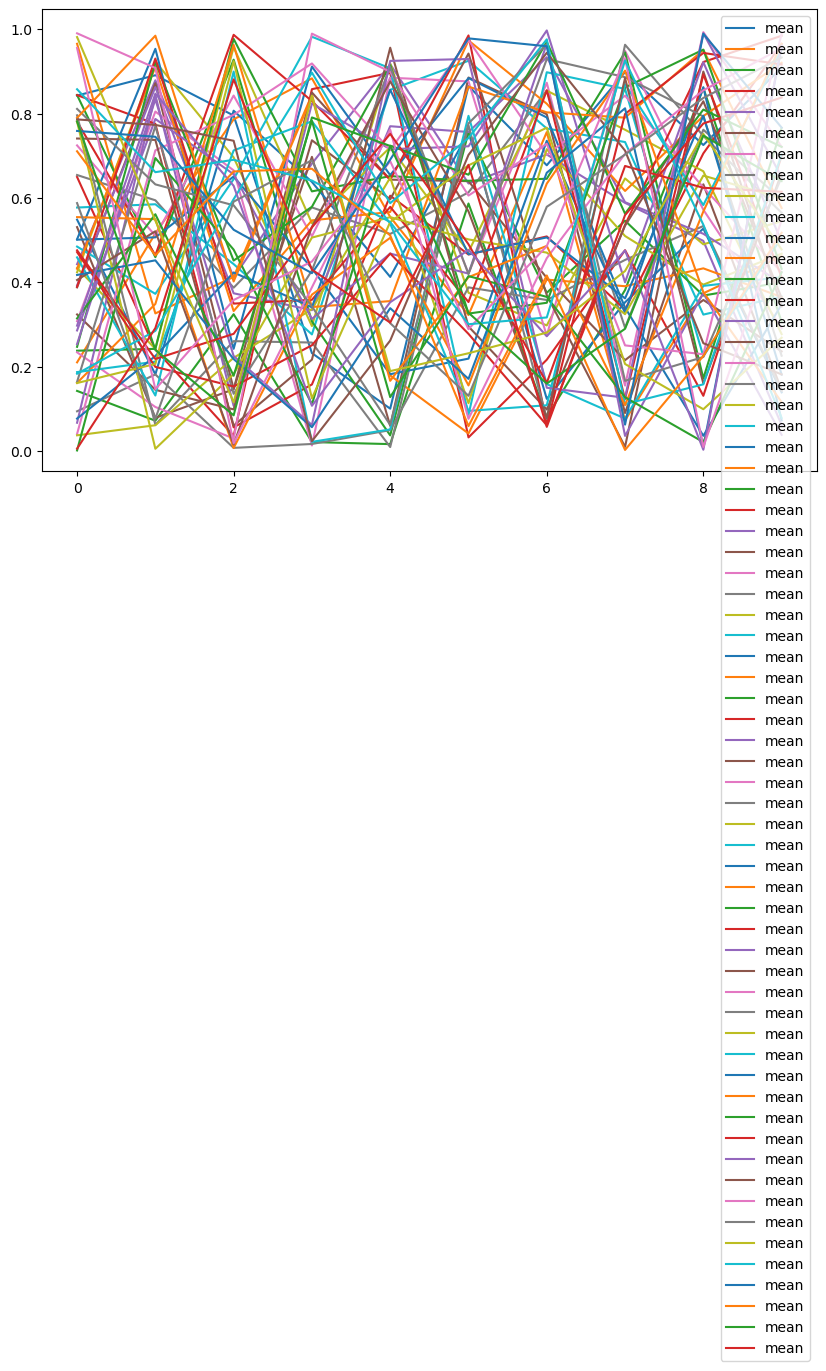

In [7]:
# Создание модели для генерации гауссовых связок
def gaussian_binding(input_shape, output_shape):
    kernels = []
    for i in range(output_shape):
        kernels.append(Matern(length_scale=1.0, nu=1.5))
    regressors = []
    for i in range(output_shape):
        regressors.append(GaussianProcessRegressor(kernel=kernels[i], alpha=1e-6, normalize_y=True, n_restarts_optimizer=10))
    def predict(inputs):
        outputs = np.zeros((inputs.shape[0], output_shape * 2))
        for i in range(output_shape):
            y_mean, y_std = regressors[i].predict(inputs, return_std=True)
            outputs[:, i] = y_mean
            outputs[:, output_shape + i] = y_std
        return norm(loc=outputs[:, :output_shape], scale=np.maximum(np.zeros((inputs.shape[0], output_shape)), outputs[:, output_shape:]))
    return predict

# Создание модели Deep GPVAR с использованием гауссовых связок
def deep_gpvar(input_shape, output_shape):
    inputs = np.random.rand(1, *input_shape)
    x = np.random.rand(1, 64)
    z = gaussian_binding(64, *output_shape)(x)
    outputs = gaussian_binding(output_shape, output_shape)(z.sample())
    return outputs

# Пример использования модели для генерации прогнозов и построения графика
input_shape = (10, 64)
output_shape = 3
inputs = np.random.rand(1, *input_shape)


plt.figure(figsize=(10, 6))
plt.plot(inputs.mean(axis=0), label='mean')

plt.legend()
plt.show()